In [1]:
%matplotlib inline


# Custom tick formatter for time series


When plotting time series, e.g., financial time series, one often wants
to leave out days on which there is no data, i.e. weekends.  The example
below shows how to use an 'index formatter' to achieve the desired plot



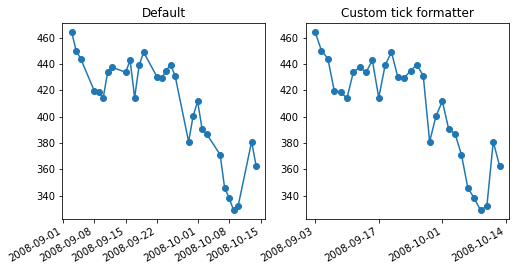

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)
r = r[-30:]  # get the last 30 days
# Matplotlib works better with datetime.datetime than np.datetime64, but the
# latter is more portable.
date = r.date.astype('O')

# first we'll do it the default way, with gaps on weekends
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
ax = axes[0]
ax.plot(date, r.adj_close, 'o-')
ax.set_title("Default")
fig.autofmt_xdate()

# next we'll write a custom formatter
N = len(r)
ind = np.arange(N)  # the evenly spaced plot indices


def format_date(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N - 1)
    return date[thisind].strftime('%Y-%m-%d')

ax = axes[1]
ax.plot(ind, r.adj_close, 'o-')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.set_title("Custom tick formatter")
fig.autofmt_xdate()

plt.show()